In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port lincoln
Processing Record 2 of Set 1 | kaitangata
Processing Record 3 of Set 1 | ketchikan
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | nakamura
Processing Record 7 of Set 1 | amderma
City not found. Skipping...
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | vryburg
Processing Record 10 of Set 1 | dire
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | san carlos del zulia
Processing Record 15 of Set 1 | kuusamo
Processing Record 16 of Set 1 | port shepstone
Processing Record 17 of Set 1 | west bay
Processing Record 18 of Set 1 | gazanjyk
Processing Record 19 of Set 1 | lerwick
Processing Record 20 of Set 1 | fethiye
Processing Record 21 of Set 1 | beringovs

Processing Record 37 of Set 4 | tingo maria
Processing Record 38 of Set 4 | mehamn
Processing Record 39 of Set 4 | cap malheureux
Processing Record 40 of Set 4 | sambava
Processing Record 41 of Set 4 | baikunthpur
Processing Record 42 of Set 4 | nara
Processing Record 43 of Set 4 | tomatlan
Processing Record 44 of Set 4 | aklavik
Processing Record 45 of Set 4 | formiga
Processing Record 46 of Set 4 | san andres
Processing Record 47 of Set 4 | yate
Processing Record 48 of Set 4 | the valley
Processing Record 49 of Set 4 | sitka
Processing Record 50 of Set 4 | springbok
Processing Record 1 of Set 5 | joetsu
Processing Record 2 of Set 5 | hudson bay
Processing Record 3 of Set 5 | bethel
Processing Record 4 of Set 5 | ilulissat
Processing Record 5 of Set 5 | samusu
City not found. Skipping...
Processing Record 6 of Set 5 | yanam
Processing Record 7 of Set 5 | saint-pierre
Processing Record 8 of Set 5 | saint-joseph
Processing Record 9 of Set 5 | taksimo
Processing Record 10 of Set 5 | mars

Processing Record 29 of Set 8 | upernavik
Processing Record 30 of Set 8 | rio pomba
Processing Record 31 of Set 8 | pucara
Processing Record 32 of Set 8 | marystown
Processing Record 33 of Set 8 | taltal
Processing Record 34 of Set 8 | along
Processing Record 35 of Set 8 | evensk
Processing Record 36 of Set 8 | sinnamary
Processing Record 37 of Set 8 | grindavik
Processing Record 38 of Set 8 | port hardy
Processing Record 39 of Set 8 | kaduna
Processing Record 40 of Set 8 | quelimane
Processing Record 41 of Set 8 | naze
Processing Record 42 of Set 8 | lebu
Processing Record 43 of Set 8 | khandbari
Processing Record 44 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 45 of Set 8 | warqla
City not found. Skipping...
Processing Record 46 of Set 8 | mookane
Processing Record 47 of Set 8 | ust-tsilma
Processing Record 48 of Set 8 | vila franca do campo
Processing Record 49 of Set 8 | saint-francois
Processing Record 50 of Set 8 | coos bay
Processing Record 1 of Set 9 | kira

Processing Record 17 of Set 12 | alotau
City not found. Skipping...
Processing Record 18 of Set 12 | yerbogachen
Processing Record 19 of Set 12 | tuggurt
City not found. Skipping...
Processing Record 20 of Set 12 | ossora
Processing Record 21 of Set 12 | teya
Processing Record 22 of Set 12 | jumla
Processing Record 23 of Set 12 | rudnogorsk
Processing Record 24 of Set 12 | champerico
Processing Record 25 of Set 12 | ewing
Processing Record 26 of Set 12 | komsomolets
Processing Record 27 of Set 12 | iaciara
Processing Record 28 of Set 12 | bara
Processing Record 29 of Set 12 | mao
Processing Record 30 of Set 12 | hatillo
Processing Record 31 of Set 12 | prince rupert
Processing Record 32 of Set 12 | labuhan
Processing Record 33 of Set 12 | gamba
Processing Record 34 of Set 12 | petropavlovka
Processing Record 35 of Set 12 | sao joao da barra
Processing Record 36 of Set 12 | itatiaia
Processing Record 37 of Set 12 | coro
Processing Record 38 of Set 12 | nizhnevartovsk
Processing Record 3

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Lincoln,-34.7333,135.8667,61.77,77,51,12.59,AU,2022-02-02 19:14:28
1,Kaitangata,-46.2817,169.8464,56.89,96,100,9.06,NZ,2022-02-02 19:14:28
2,Ketchikan,55.3422,-131.6461,35.58,86,100,5.75,US,2022-02-02 19:14:28
3,Yellowknife,62.4560,-114.3525,-26.59,85,89,3.24,CA,2022-02-02 19:14:29
4,Nikolskoye,59.7035,30.7861,22.89,99,98,1.03,RU,2022-02-02 19:14:29
5,Nakamura,32.9833,132.9333,36.99,81,99,4.25,JP,2022-02-02 19:14:29
6,Jamestown,42.0970,-79.2353,43.92,52,100,9.22,US,2022-02-02 19:14:30
7,Vryburg,-26.9566,24.7284,73.17,66,6,7.78,ZA,2022-02-02 19:14:30
8,Dire,12.2833,-10.9667,85.64,7,4,3.56,ML,2022-02-02 19:14:30
9,Punta Arenas,-53.1500,-70.9167,50.02,84,75,5.75,CL,2022-02-02 19:12:15


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Lincoln,AU,2022-02-02 19:14:28,-34.7333,135.8667,61.77,77,51,12.59
1,Kaitangata,NZ,2022-02-02 19:14:28,-46.2817,169.8464,56.89,96,100,9.06
2,Ketchikan,US,2022-02-02 19:14:28,55.3422,-131.6461,35.58,86,100,5.75
3,Yellowknife,CA,2022-02-02 19:14:29,62.4560,-114.3525,-26.59,85,89,3.24
4,Nikolskoye,RU,2022-02-02 19:14:29,59.7035,30.7861,22.89,99,98,1.03
5,Nakamura,JP,2022-02-02 19:14:29,32.9833,132.9333,36.99,81,99,4.25
6,Jamestown,US,2022-02-02 19:14:30,42.0970,-79.2353,43.92,52,100,9.22
7,Vryburg,ZA,2022-02-02 19:14:30,-26.9566,24.7284,73.17,66,6,7.78
8,Dire,ML,2022-02-02 19:14:30,12.2833,-10.9667,85.64,7,4,3.56
9,Punta Arenas,CL,2022-02-02 19:12:15,-53.1500,-70.9167,50.02,84,75,5.75


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

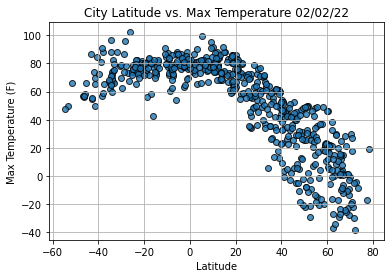

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

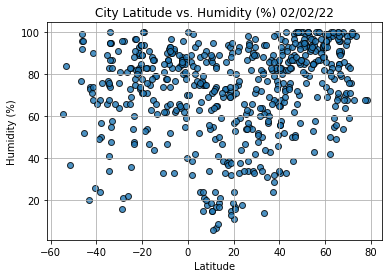

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

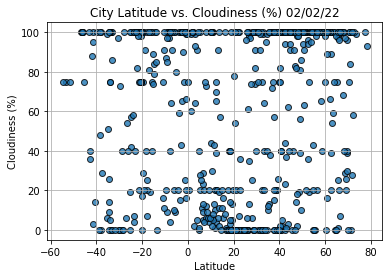

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

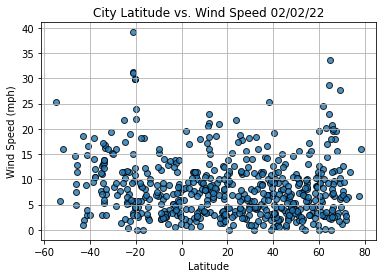

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [51]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [52]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Ketchikan,US,2022-02-02 19:14:28,55.3422,-131.6461,35.58,86,100,5.75
3,Yellowknife,CA,2022-02-02 19:14:29,62.4560,-114.3525,-26.59,85,89,3.24
4,Nikolskoye,RU,2022-02-02 19:14:29,59.7035,30.7861,22.89,99,98,1.03
5,Nakamura,JP,2022-02-02 19:14:29,32.9833,132.9333,36.99,81,99,4.25
6,Jamestown,US,2022-02-02 19:14:30,42.0970,-79.2353,43.92,52,100,9.22


In [66]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

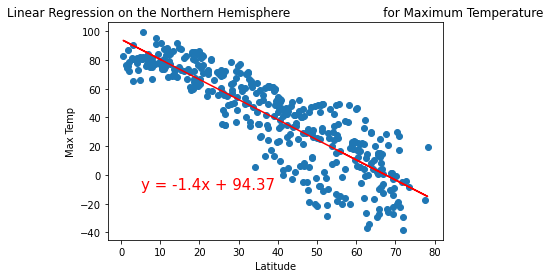

In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(5,-10))

In [68]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = -1.4x + 94.37
The r-value is: -0.864


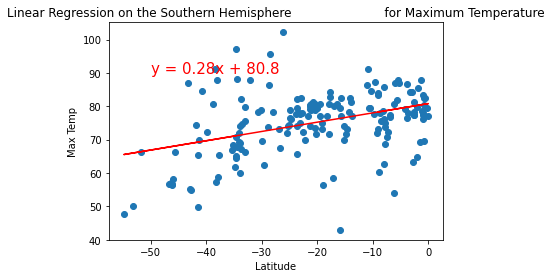

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(-50,90))

In [70]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = 0.28x + 80.8
The r-value is: 0.397


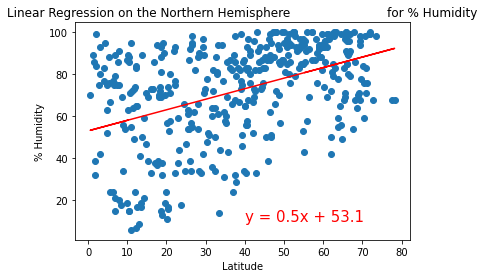

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [72]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = 0.5x + 53.1
The r-value is: 0.435


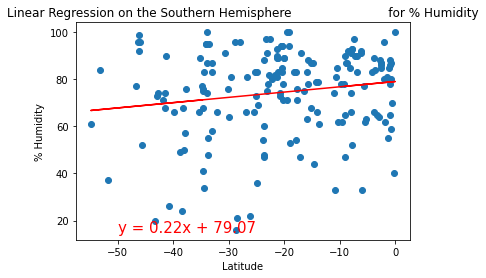

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [74]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = 0.22x + 79.07
The r-value is: 0.165


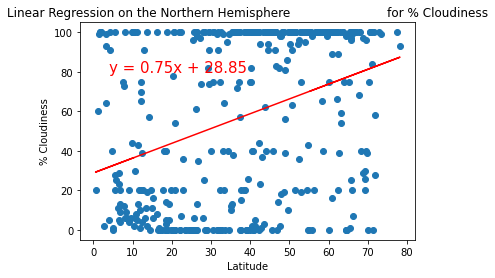

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(4,80))

In [76]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = 0.75x + 28.85
The r-value is: 0.363


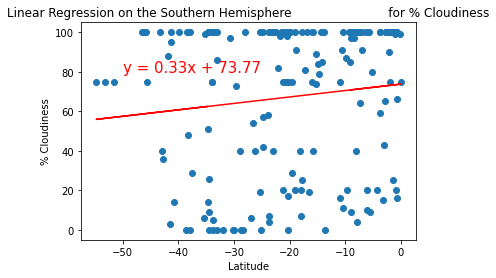

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,80))

In [78]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = 0.33x + 73.77
The r-value is: 0.118


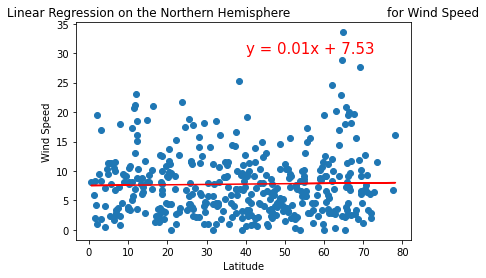

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,30))

In [80]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = 0.01x + 7.53
The r-value is: 0.023


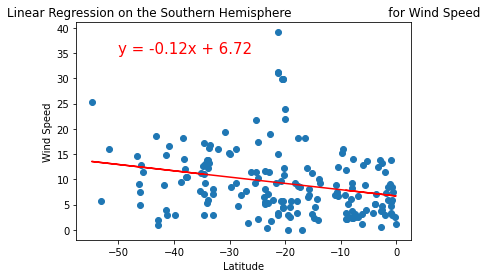

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [82]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = -0.12x + 6.72
The r-value is: -0.251
